## XGBoost

極限梯度提升 eXtreme Gradient Boosting(XGBoost) ，被稱為 Kaggle 競賽神器，常常第一名都是使用這個演算法。


### 樹算法發展過程

[以下圖片來源](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)

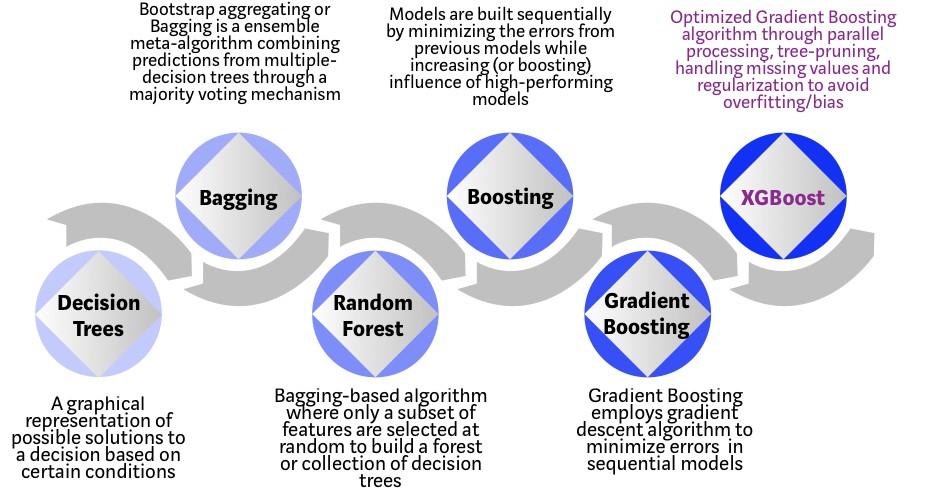

- Decision trees（決策樹)：是一種過程直覺單純、執行效率也相當高的監督式機器學習模型，但只有一棵樹容易過擬和資料。
- Bagging(裝袋法)：(Bootstrap Aggregating, Bagging)，把訓練資料重新採樣之後，就可以產生不同組的訓練資料。接著透過多數投票機制將弱分類器組合起來成一個強分類器。
- Random Forest：建立於 Bagging 的方式，每棵決策樹隨機選擇特徵，最後建構一個森林，可以比決策樹不容易過度擬合，並且讓預測能力提升。
- Boosting：目標是為了要避免學習錯誤，讓自己往學正確的東西。根據預測錯誤的資料調整其權重值，讓模型下次能學習比較好。
- Gradient Boosting：利用梯度下降演算法來最小化模型的目標函數值。
- XGBoost：極限梯度提升，利用平行化運算執行 Gradient Boosting 演算法，且包含剪枝(決策樹修剪)，處理遺漏值和正規化處理，避免過度擬合資料。

### XGBoost 特色

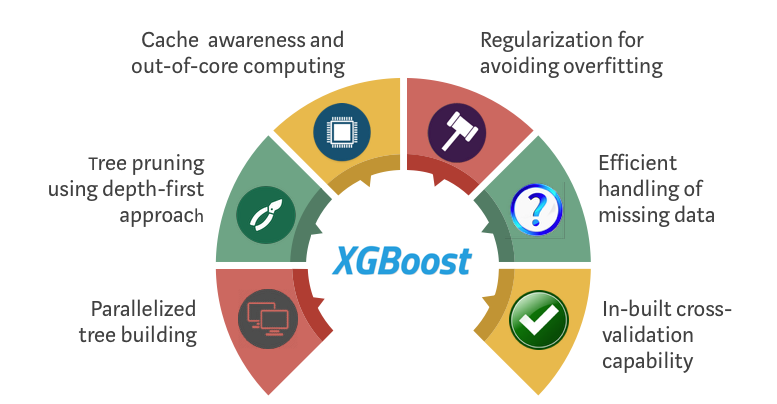

- 平行運算
- 剪枝
- 硬體優化
- 正規化
- 遺漏值處理
- 交叉驗證

### 演算法比較

從下圖可以發現，XGBoost 相比其他演算法的優點是訓練速度快、準確率也高

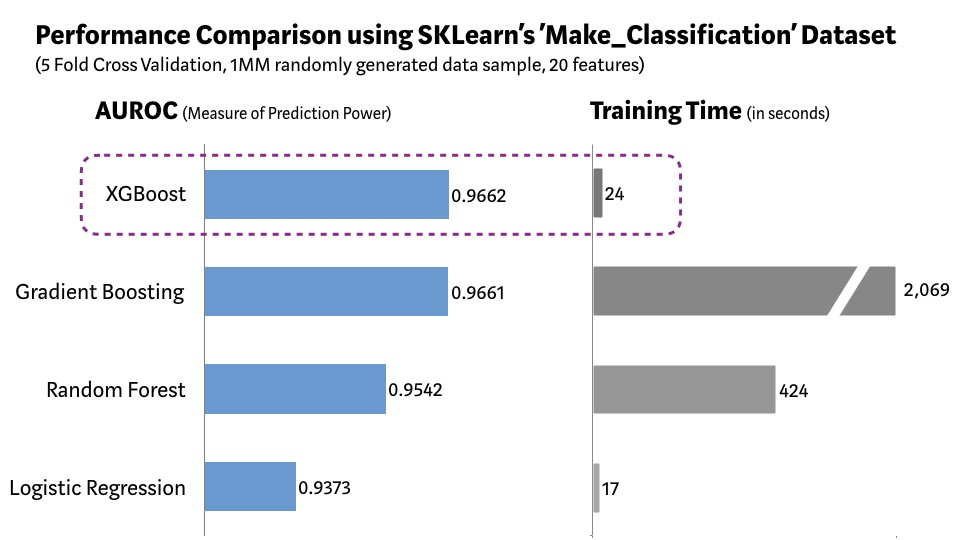

### 安裝方式
```
pip install xgboost
```

### 實際示範

In [13]:
# XGBoost

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Book_Purchased.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 5].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from xgboost import XGBClassifier

# 建立XGBClassifier模型
classifier = XGBClassifier(n_estimators=1000, learning_rate= 0.01)
# 使用訓練資料訓練模型
classifier.fit(X_train, y_train)
# 使用訓練資料預測分類
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[59  8]
 [ 5 28]]


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        67
           1       0.78      0.85      0.81        33

    accuracy                           0.87       100
   macro avg       0.85      0.86      0.86       100
weighted avg       0.87      0.87      0.87       100



### 看圖說故事

每個特徵重要程度:  [0.49414912 0.50585085]


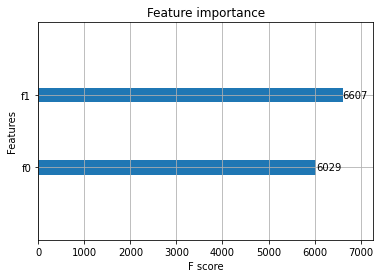

In [19]:
# 可以畫特徵的重要程度
from xgboost import plot_importance

plot_importance(classifier)
print('每個特徵重要程度: ', classifier.feature_importances_)

In [23]:
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

mac 安裝
```
brew install graphviz 
```
或是安裝 
```
pip install graphviz
```

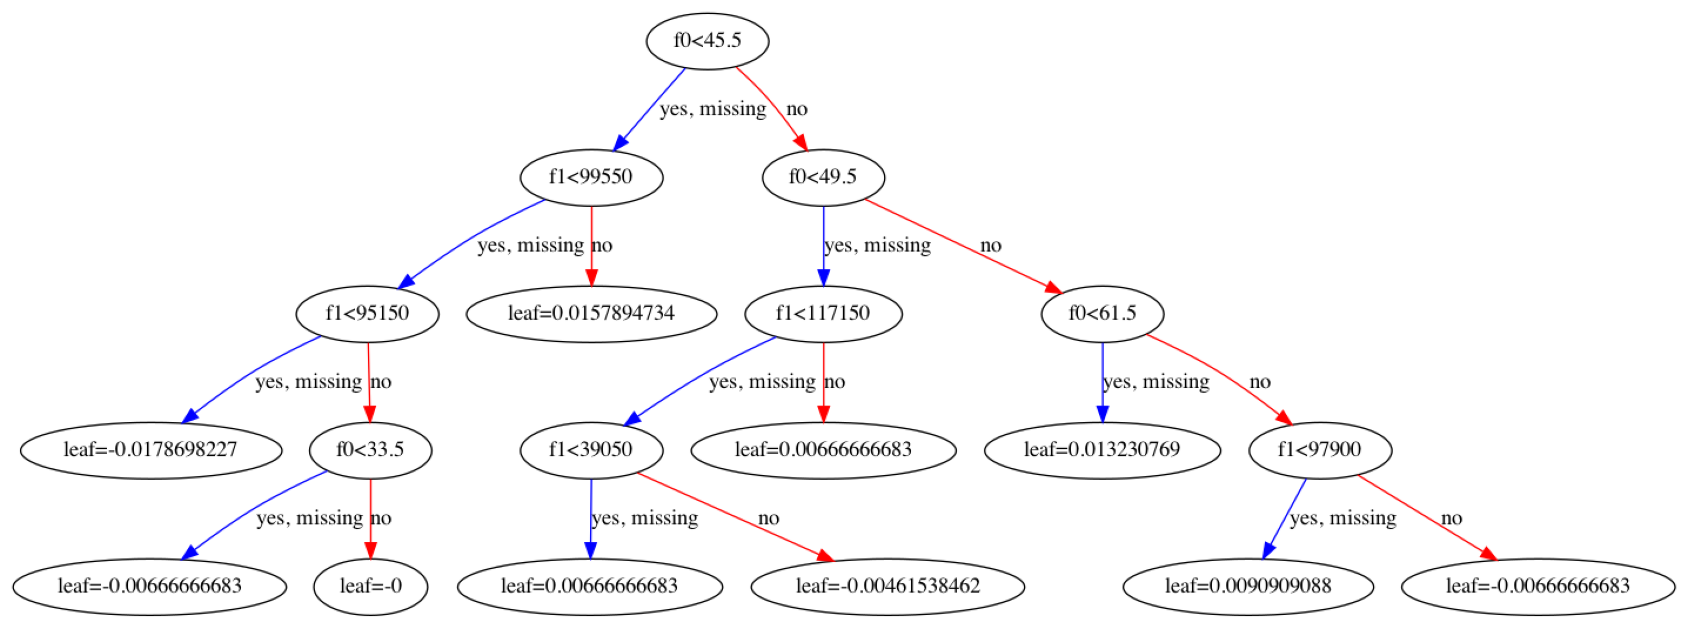

In [30]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(classifier, ax=ax)
plt.savefig('xgboost_tree.png')
plt.show()

### 比較目前所學的演算法

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:09:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


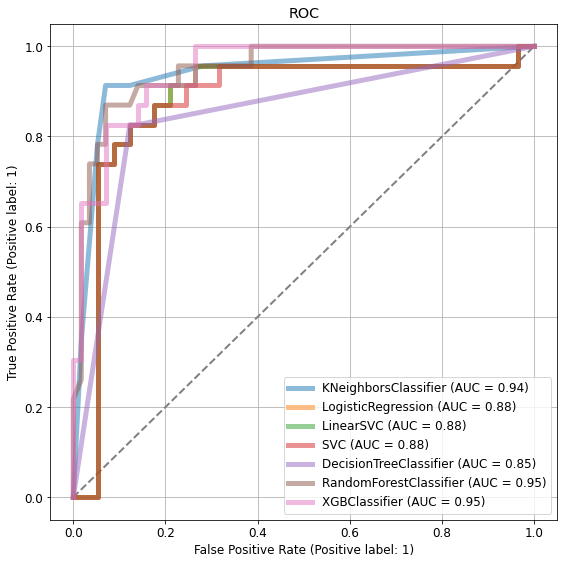

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('Book_Purchased.csv')
dataset['Purchased'] = dataset['Purchased'].astype('str')
dx = dataset.iloc[:, [2, 3, 4]].values
dy = dataset.iloc[:, 5].values
dx = PCA(n_components=2).fit_transform(dx)
dx = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size=0.2, random_state=0)

# 建立不同模型
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    LinearSVC(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    ]
# 訓練不同模型
for i, _ in enumerate(models):
    models[i].fit(dx_train, dy_train)
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 8))
# 建立子圖表
ax = plt.subplot(111)
ax.set_title('ROC')
# 畫對角線
ax.plot([0, 1], [0, 1], color='grey',
        linewidth=2, linestyle='--')
# 對每個模型畫 ROC 曲線
for model in models:
    plot_roc_curve(model, dx_test, dy_test,
                   linewidth=5, alpha=0.5, ax=ax)
plt.grid(True)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.tight_layout()
plt.show()